In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt 
import seaborn as sns

In [15]:
#setup

v = 49
gamma = 1.5
lamda = 2
omega = 1 

n = 1000

In [24]:
def linearmodel(q):
    
    num_simulations = 1000

    p_c_s = []
    p_c_rd = []
    p_equals_c_s = []
    p_equals_c_rd = []


    for sim in np.arange(num_simulations): 

        # step 1 & 2
        u_1 = []
        u_2 = []

        for i in np.arange(n):
            u_1.append(random.randrange(0, 10000, 1))
            u_2.append(random.randrange(0, 10000, 1))

        d = {'u_1': u_1, 'u_2': u_2}
        df = pd.DataFrame(data=d)

        df["p"] = df["u_1"].rank(ascending=False) 
        df['c_0'] = q*df['p'] + (1-q)*df['u_2'] 
        df["c_0"] = df["c_0"].rank(ascending=True) 

        #step 3
        e_s = v**(1/gamma)
        e_1 = ((1+omega)*v)**(1/gamma)
        e_2 = ((1 + (omega * lamda)) * v)**(1/gamma)

        df['I'] = (df['c_0'] >= df['p']).astype(int)

        #step 4
        df['u_s'] = df['c_0'] - e_s
        df['c_s'] = df['u_s'].rank(ascending=True)

        conditions = [
            (df['c_0'] - e_2) > df['p'],
            (df['c_0'] - e_1) <= df['p'],
            ((df['c_0'] - e_2) < df['p']) & ((df['c_0'] - e_1) > df['p'])
        ]

        choices = [df['c_0'] - e_2, df['c_0'] - e_1, df['p']]

        df['u_rd'] = np.select(conditions, choices)
        df['c_rd'] = df['u_rd'].rank(ascending=True)

        #step 5
        p_c_s.append(df['p'].corr(df['c_s']))
        p_c_rd.append(df['p'].corr(df['c_rd']))

        p_equals_c_s.append(sum(df['p'] == df['c_s']))
        p_equals_c_rd.append(sum(df['p'] == df['c_rd']))
        
    plt.hist(p_c_s, bins=100, alpha=0.6, lw=1, label="p_c_s")
    plt.hist(p_c_rd, bins=100, alpha=0.6, lw=1, label="p_c_rd")
    plt.legend()
    plt.show()
    
    return df['c_0'].corr(df['p'])

In [23]:
df['c_0'].corr(df['p'])

0.13147853227233083

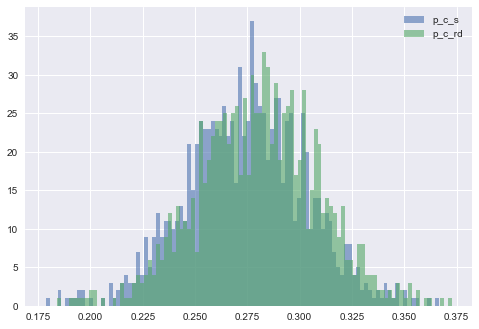

0.26472942144123601

In [27]:
linearmodel(0.75)

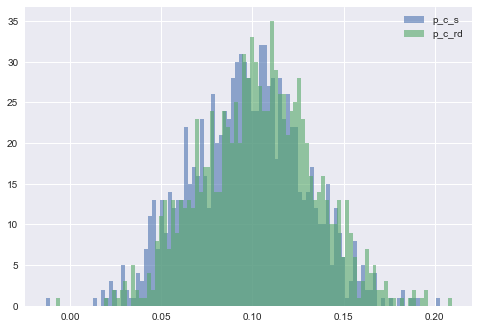

In [14]:
linearmodel(0.5)

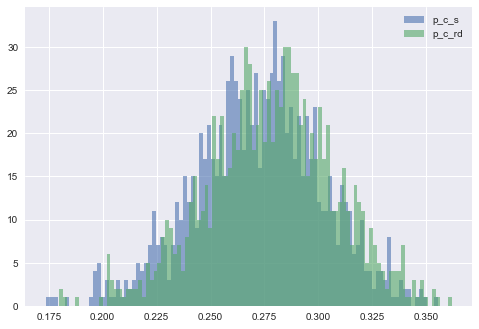

In [17]:
linearmodel(0.75)

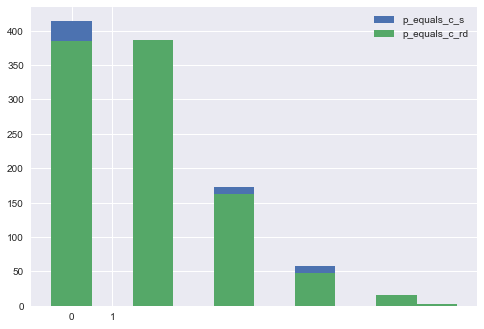

In [18]:
plt.hist(p_equals_c_s, label="p_equals_c_s")
plt.hist(p_equals_c_rd, label="p_equals_c_rd")
plt.legend()
plt.xticks((0.25, 0.75), (0, 1))
plt.show()

In [34]:
df.head(100)

,u_1,u_2,p,c_0,I,u_s,c_s,u_rd,c_rd
0,4438,593,533.0,929.0,1,920.45012,929.0,911.215533,929.0
1,4742,6340,490.0,349.0,0,340.45012,349.0,335.427912,350.0
2,1920,876,796.0,898.0,1,889.45012,898.0,880.215533,897.0
3,198,5794,976.0,400.0,0,391.45012,400.0,386.427912,401.0
4,5743,2554,406.0,752.0,1,743.45012,752.0,734.215533,750.0
5,9424,833,61.5,906.0,1,897.45012,906.0,888.215533,904.5
6,2859,1434,706.0,850.0,1,841.45012,850.0,832.215533,848.0
7,8566,4412,150.0,543.0,1,534.45012,543.0,525.215533,542.0
8,2155,2885,782.5,718.0,0,709.45012,718.0,704.427912,720.0
9,4489,4065,523.0,578.5,1,569.95012,578.5,560.715533,578.0


## Percentile Comparison

In [10]:
bottom = 0.5
top = 0.25

In [11]:
df['p_percentile'] = (df['p'].rank(pct = True))
df['c_percentile'] = (df['c_rd'].rank(pct = True))

percent_upwards = len(df.loc[(df['p_percentile'] > bottom) & (df['c_percentile'] <= top)]) / len(df) * 100 
percent_downwards = len(df.loc[(df['p_percentile'] <= top) & (df['c_percentile'] > bottom)]) / len(df) * 100

In [13]:
percent_upwards, percent_downwards

(10.7, 12.5)